# [作業目標]
練習填入對應的欄位資料或公式, 完成題目的要求

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp




In [48]:
dir_data = 'desktop/data/'

f_app = os.path.join(dir_data,'application_train.csv')
print('path of read in data is : %s'%(f_app))
app_train = pd.read_csv(f_app)
app_train.head()

path of read in data is : desktop/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


作業
1.請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
  0 個小孩
  有 1 - 2 個小孩
  有 3 - 5 個小孩
  有超過 5 個小孩
2.請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

3.請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [49]:
#作業1.請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP 
#0 個小孩 有 1 - 2 個小孩 有 3 - 5 個小孩 有超過 5 個小孩
"""
Your code here
"""
cut_rule = [-1,0,2,5,app_train['CNT_CHILDREN'].max()] #以最大值作為分組上限

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [50]:
#作業2-1請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
Your code here
"""
#先設定目標分組組群
grp = ['CNT_CHILDREN','TARGET']
                       #設定該族群欲觀察之變項（'AMT_INCOME_TOTAL'）
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()


CNT_CHILDREN  TARGET
0             0         166747.010980
              1         160804.210548
1             0         175008.249905
              1         182361.980198
2             0         173638.366582
              1         161512.254393
3             0         175181.301131
              1         162379.055866
4             0         173941.844920
              1         143378.181818
5             0         174889.870130
              1         209571.428571
6             0         144750.000000
              1         142500.000000
7             0         136928.571429
8             0         108000.000000
9             1         225000.000000
10            0          67500.000000
11            1         315000.000000
12            0         281250.000000
14            0         108000.000000
19            0         112500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

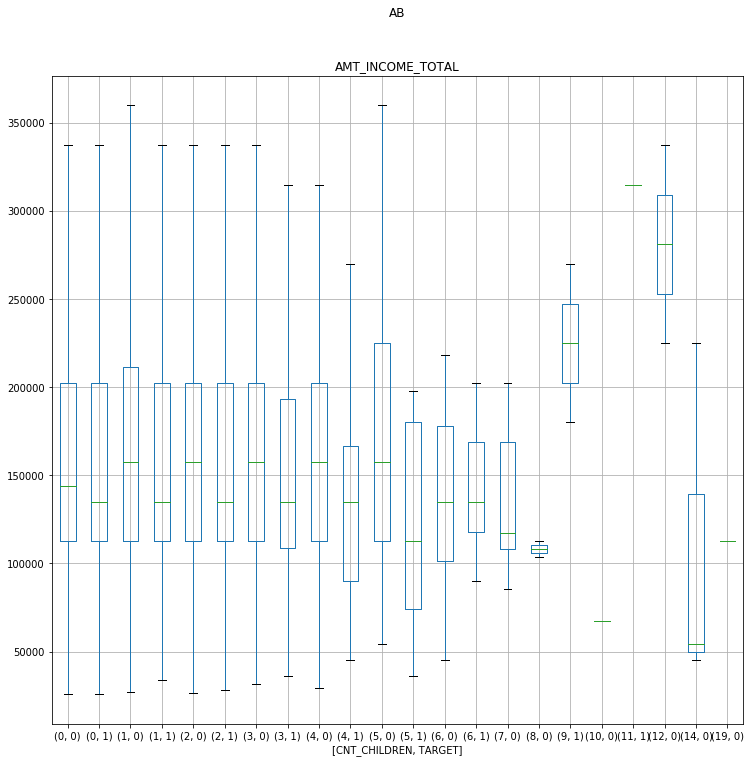

In [53]:
#作業2-2
"""
Your code here
"""
#比較特徵
mp_column =['AMT_INCOME_TOTAL']
#比較群族
mp_by = ['CNT_CHILDREN','TARGET']


app_train.boxplot(column=mp_column, by = mp_by, showfliers = False, figsize=(12,12))
mp.suptitle('AB')
mp.show()

In [54]:
#作業3請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
"""
Your code here
"""
#設定須轉換Ｚ分數族群
grouped_df =app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL']
#執行轉換Ｚ分數
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: x-x.mean()/x.std())
#列出比較
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,202498.104397
1,270000.0,269998.429580
2,67500.0,67498.429580
3,135000.0,134998.429580
4,121500.0,121498.429580
